<a href="https://colab.research.google.com/github/ksdtt/ml-pet-projects/blob/main/eda_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1. Разведочный анализ и подготовка данных (пингвины)**

---


1. Загрузите набор данных о пингвинах, собранный на островах близ Антарктиды: https://www.kaggle.com/datasets/ashkhagan/palmer-penguins-datasetalternative-iris-dataset
2. Создайте ноутбук в Google Colab и подключите к нему скачанный набор данных.
3. Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.
4. Определите наличие пропусков в данных. Предложите способы заполнения пропусков.
5. Для нескольких признаков (количественных и категориальных) подберите лучший способ визуализации распределения значений.
6. Проверьте наличие отклонений и аномалий в распределении значений признаков.  
7. Примените нормализацию к какому-либо количественному признаку. Визуализируйте результат нормализации.
8. Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.
9. Предположите зависимости какой-либо пары признаков друг от друга. С помощью визуализации подтвердите или опровергните эту зависимость.
10. Постройте "тепловую карту" зависимости признаков.
11. В качестве итогового вывода сделайте предположение о значимости каждого признака для будущего анализа этого набора данных. 
12. Примените метод главных компонент для уменьшения размерности.

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go

import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/python/penguins.csv')
data.shape

(344, 7)

## Описание датасета

In [ ]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
print(data['species'].value_counts(), end='\n\n')
print(data['island'].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


**Описание датасета:**

344 строки и 7 столбцов, 3 категориальных признака и 4 числовых

* species            - вид (Adelie, Gentoo, Chinstrap);
* island             - название острова в архипелаге Палмера (Biscoe, Dream, Torgersen);
* bill_length_mm     - длина клюва в мм;
* bill_depth_mm	     - толщина клюва в мм;
* flipper_length_mm	 - длина крыла в мм;
* body_mass_g	     - масса тела в граммах;
* sex                - пол.



## Первичное статистическое исследование количественных и категориальных признаков.

In [ ]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Толщина клюва имеет малое отклонение от среднего значения, поэтому, возможно, этот признак не так важен, а масса тела напротив сильно отклоняется от среднего и скорее всего имеет связь с другими признаками, например, пол и вид.

In [ ]:
data.describe(include='O')

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


## Определим наличие пропусков и предложим способы их заполнения

In [ ]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
data[data['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Так как в двух строках пропущены почти все значения, то лучше эти строки удалить


In [ ]:
data.drop(index=[3, 271], inplace=True)
data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [ ]:
data[data['sex'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [ ]:
data_null_index = data.index[data['sex'].isnull()].to_list()
data_null_index

[8, 9, 10, 11, 47, 178, 218, 256, 268]

Попробуем заполнить пропуски каким-нибудь "другим" (третьим) значением, чтобы посмотреть на графиках этих особей.

Так как пропусков не так много, то можно на глаз установить принадлежность пола по графику


### Заполнение пропусков с помощью графиков

In [ ]:
data['sex'].fillna('no_information', inplace=True)

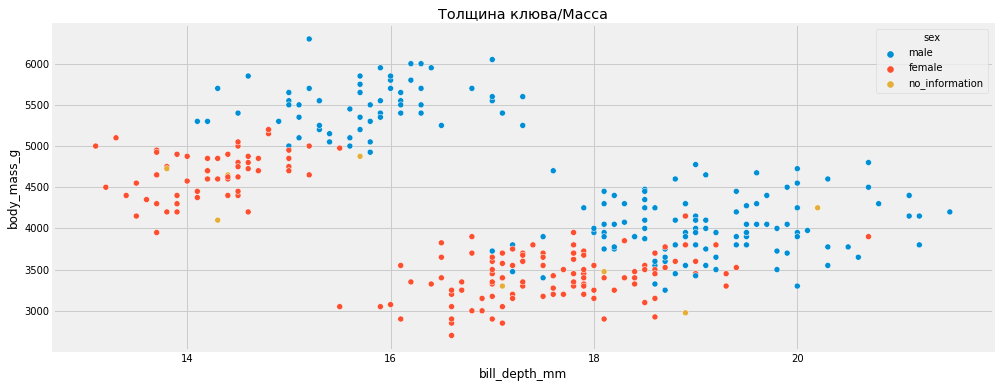

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=data, x='bill_depth_mm', y='body_mass_g', hue='sex', sizes=(15,15)).set(title='Толщина клюва/Масса')



---



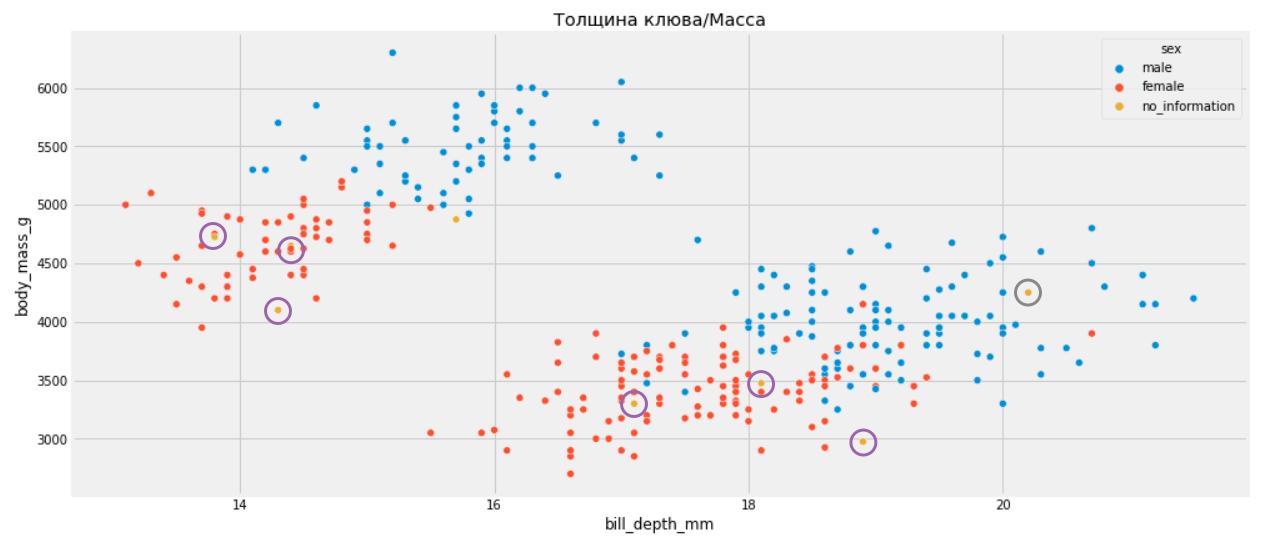



Пометим выделенные фиолетовым цветом как женские особи, а выделенную серым - мужская особь. Посмотрим результат

In [ ]:
data[data['sex'] == 'no_information']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,no_information
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,no_information
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,no_information
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,no_information
47,Adelie,Dream,37.5,18.9,179.0,2975.0,no_information
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,no_information
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,no_information
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,no_information
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,no_information


In [ ]:
data.loc[(data['sex'] == 'no_information') & (data['body_mass_g'] < 5000) & (data['body_mass_g'] > 4000) & (data['bill_depth_mm'] < 15), 'sex'] = 'female'

data.loc[(data['sex'] == 'no_information') & (data['body_mass_g'] <= 3500) & (data['bill_depth_mm'] > 16) & (data['bill_depth_mm'] < 20), 'sex'] = 'female'

data.loc[(data['sex'] == 'no_information') & (data['body_mass_g'] < 4500) & (data['body_mass_g'] > 4000) & (data['bill_depth_mm'] > 20), 'sex'] = 'male'

In [ ]:
data[data['sex'] == 'no_information']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,no_information
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,no_information


Осталось две особи с неопределенным полом, рассмотрим другой график

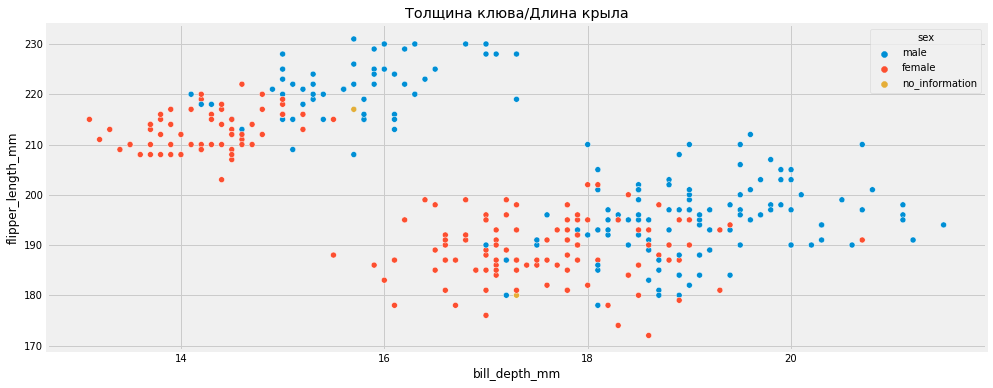

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(data=data, x='bill_depth_mm', y='flipper_length_mm', hue='sex', sizes=(15,15)).set(title='Толщина клюва/Длина крыла')



---



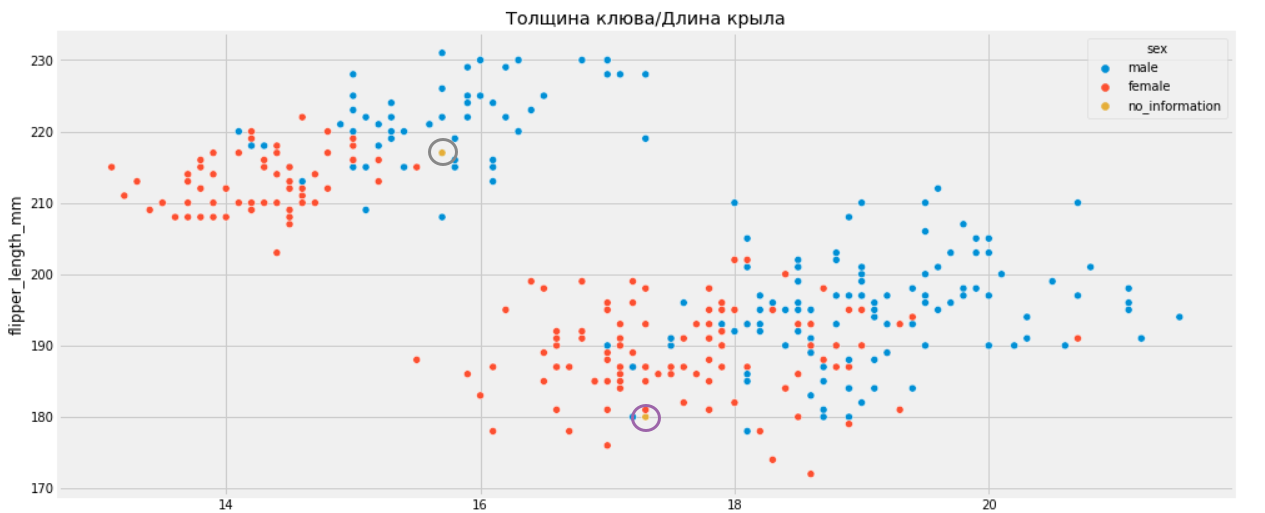

Сделаем аналогичные замены пропущенного значения


In [ ]:
data.loc[(data['sex'] == 'no_information') & (data['flipper_length_mm'] == 180.0), 'sex'] = 'female'

data.loc[(data['sex'] == 'no_information') & (data['flipper_length_mm'] < 220) & (data['flipper_length_mm'] > 210), 'sex'] = 'male'

In [ ]:
data[data['sex'] == 'no_information']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [ ]:
data1 = {x: data['sex'].loc[x] for x in data_null_index}
data1

{8: 'female',
 9: 'male',
 10: 'female',
 11: 'female',
 47: 'female',
 178: 'female',
 218: 'female',
 256: 'female',
 268: 'male'}

Таким образом, пропуски заполнены

### Заполнение пропусков с помощью медианы по весу для каждого вида

In [ ]:
m1 = data.loc[(data['sex']=="female") & (data['species']=="Adelie")]["body_mass_g"].median()

m2 = data.loc[(data['sex']=="male") & (data['species']=="Adelie")]["body_mass_g"].median()

k1 = (m1+m2)//2

m3 = data.loc[(data['sex']=="female") & (data['species']=="Gentoo")]["body_mass_g"].median()

m4 = data.loc[(data['sex']=="male") & (data['species']=="Gentoo")]["body_mass_g"].median()

k2 = (m3+m4)//2

print(f'''Средний вес для пингвинов-девочек и пингвинов-мальчиков вида Adelie {m1}, {m2} 
и Gentoo {m3}, {m4} соответственно.''', end='\n\n')

print(f'''Значения для заполнения пропусков. Если вес пингвина вида Adelie будет больше или равен {k1}, 
то вставляем male, иначе - female, аналогично для вида Gentoo и значения {k2}''')

Средний вес для пингвинов-девочек и пингвинов-мальчиков вида Adelie 3400.0, 4000.0 
и Gentoo 4700.0, 5500.0 соответственно.

Значения для заполнения пропусков. Если вес пингвина вида Adelie будет больше или равен 3700.0, 
то вставляем male, иначе - female, аналогично для вида Gentoo и значения 5100.0


In [ ]:
data.loc[(data['body_mass_g'] >= k1) & (data['species']=="Adelie"), 'sex'] = 'male'

data.loc[(data['body_mass_g'] < k1) & (data['species']=="Adelie"), 'sex'] = 'female'

data.loc[(data['body_mass_g'] >= k2) & (data['species']=="Gentoo"), 'sex'] = 'male'

data.loc[(data['body_mass_g'] < k2) & (data['species']=="Gentoo"), 'sex'] = 'female'

data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
data2 = {x: data['sex'].loc[x] for x in data_null_index}
data2

{8: 'female',
 9: 'male',
 10: 'female',
 11: 'male',
 47: 'female',
 178: 'female',
 218: 'female',
 256: 'female',
 268: 'female'}

### Сравним эти два способа

Кажется, первый способ точнее? посмотрим

In [ ]:
print(data1)
print(data2)

{8: 'female', 9: 'male', 10: 'female', 11: 'female', 47: 'female', 178: 'female', 218: 'female', 256: 'female', 268: 'male'}
{8: 'female', 9: 'male', 10: 'female', 11: 'male', 47: 'female', 178: 'female', 218: 'female', 256: 'female', 268: 'female'}


Результаты заполнения различаются в двух строках...неожиданный результат для меня

## Подберём наилучший способ визуализации для категориальных и числовых признаков

### Категориальные признаки

In [ ]:
fig = go.Figure(go.Pie(labels = list(data['sex'].unique()), 
                values = [len(data[data['sex']=='male']), len(data[data['sex']=='female'])]
                )
)
fig.update_layout(title='Диаграмма соотношения особей пингвинов')
fig.show()

<AxesSubplot:xlabel='island', ylabel='count'>

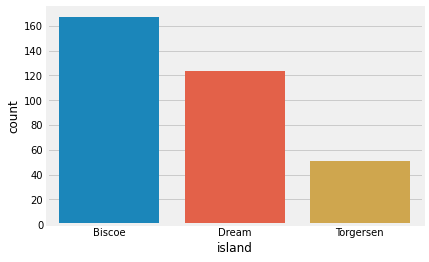

In [ ]:
sns.countplot(x=data["island"].sort_values())

Больше всего пингвинов обитают на острове Biscoe

In [ ]:
sns.countplot(data=data, x='island', hue='species', bins=5)

NameError: ignored

Виды достаточно осёдло расселяются по островам

<AxesSubplot:xlabel='island', ylabel='count'>

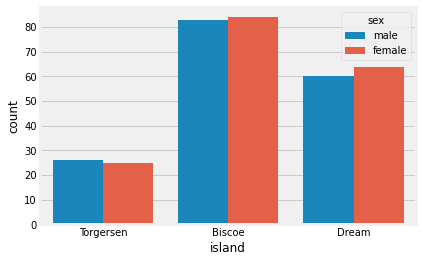

In [ ]:
sns.countplot(data=data, x="island", hue='sex')

На каждом острове особи обоих полов представлены почти в равном количестве

### Числовые признаки

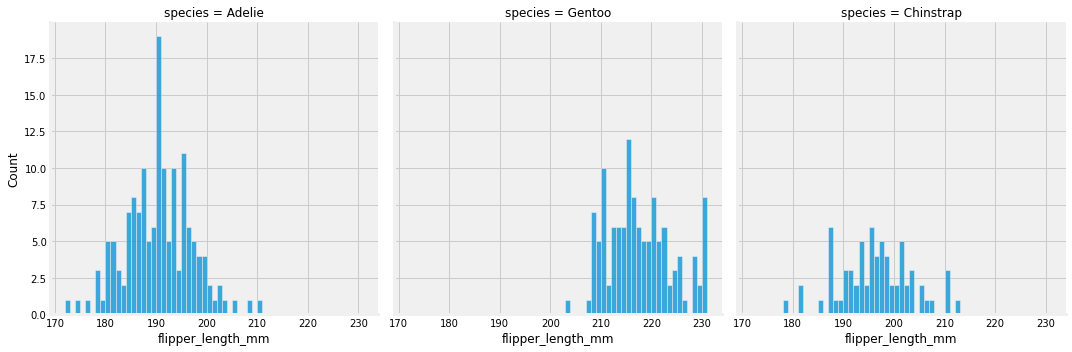

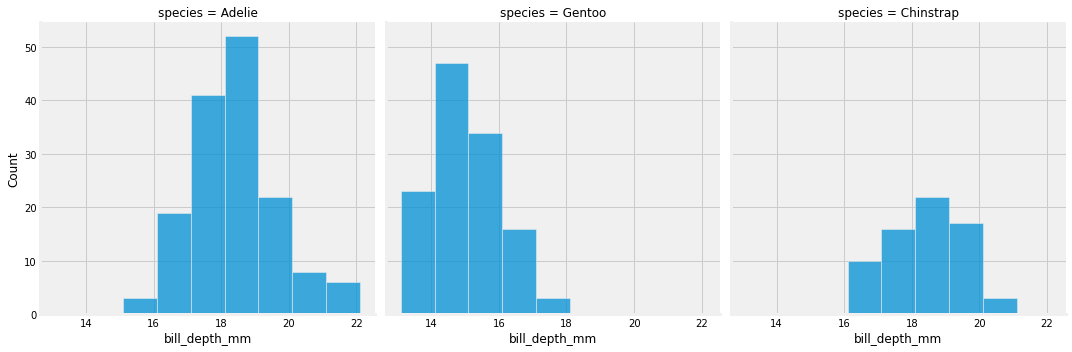

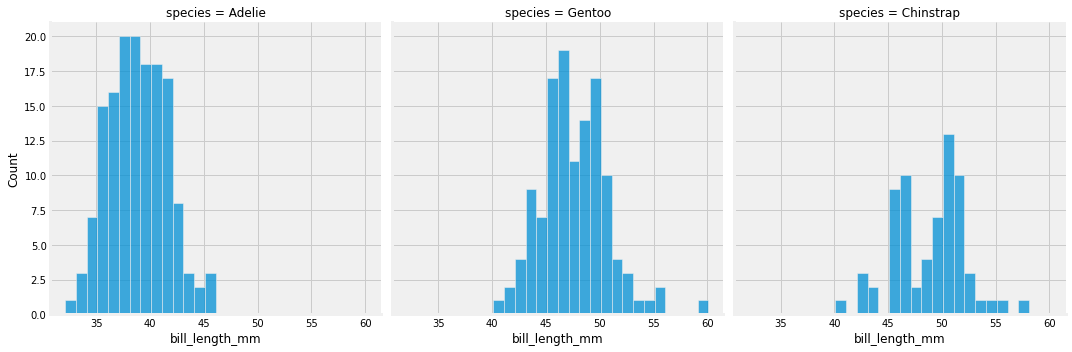

In [ ]:
columns = ['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']
for x in columns:
    sns.displot(x=x,
                binwidth=1,    # установка ширины ячейки
                col='species',
                data=data)

## Проверим наличие отклонений и аномалий в распределении значений признаков

* species            - вид (Adelie, Gentoo, Chinstrap);
* island             - название острова в архипелаге Палмера (Biscoe, Dream, Torgersen);
* bill_length_mm     - длина клюва в мм;
* bill_depth_mm	     - толщина клюва в мм;
* flipper_length_mm	 - длина крыла в мм;
* body_mass_g	     - масса тела в граммах;
* sex                - пол.

### Выбросы по островам

<AxesSubplot:xlabel='island', ylabel='bill_length_mm'>

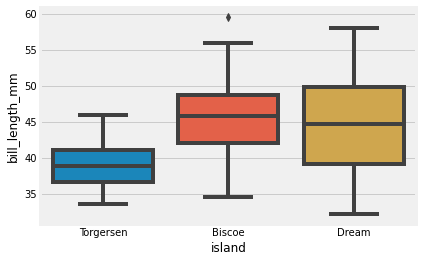

In [ ]:
#sns.scatterplot(data=data, )
sns.boxplot(data=data, x='island', y='bill_length_mm')

In [ ]:
data.loc[(data.island == 'Biscoe') & (data.bill_length_mm > 57)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
185,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male


<AxesSubplot:xlabel='island', ylabel='bill_depth_mm'>

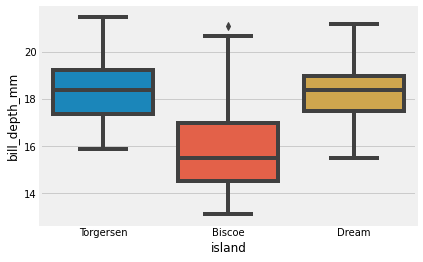

In [ ]:
sns.boxplot(data=data, x='island', y='bill_depth_mm')

In [ ]:
data.loc[(data.island == 'Biscoe') & (data.bill_depth_mm > 21)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,male


<AxesSubplot:xlabel='island', ylabel='flipper_length_mm'>

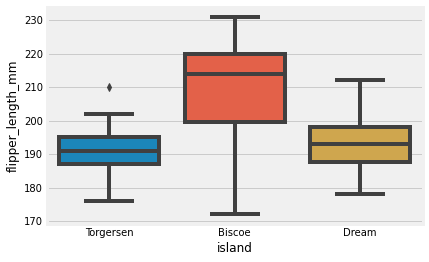

In [ ]:
sns.boxplot(data=data, x='island', y='flipper_length_mm')

In [ ]:
data.loc[(data.island == 'Torgersen') & (data.flipper_length_mm == 210)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,male


<AxesSubplot:xlabel='island', ylabel='body_mass_g'>

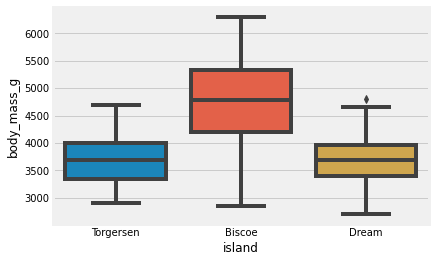

In [ ]:
sns.boxplot(data=data, x='island', y='body_mass_g')

In [ ]:
data.loc[(data.island == 'Dream') & (data.body_mass_g > 4700)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
313,Chinstrap,Dream,52.0,20.7,210.0,4800.0,male


### Выбросы по видам

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

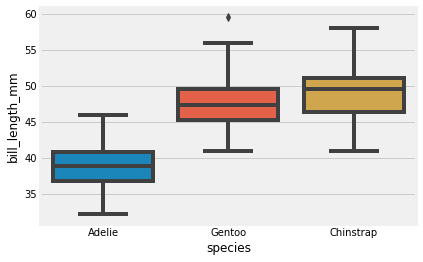

In [ ]:
sns.boxplot(data=data, x='species', y='bill_length_mm')

In [ ]:
data.loc[(data.species == 'Gentoo') & (data.bill_length_mm > 59)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
185,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male


<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

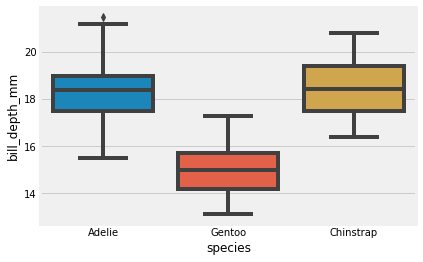

In [ ]:
sns.boxplot(data=data, x='species', y='bill_depth_mm')

In [ ]:
data.loc[(data.species == 'Adelie') & (data.bill_depth_mm == 21.5)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male


<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

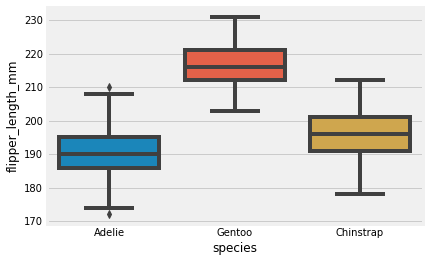

In [ ]:
sns.boxplot(data=data, x='species', y='flipper_length_mm')

In [ ]:
data.loc[(data.species == 'Adelie') & ((data.flipper_length_mm == 210) | (data.flipper_length_mm == 172))]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,male


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

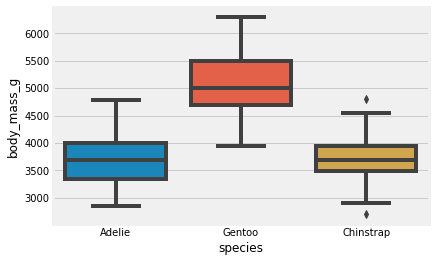

In [ ]:
sns.boxplot(data=data, x='species', y='body_mass_g')

In [ ]:
data.loc[(data.species == 'Chinstrap') & ((data.body_mass_g > 4600) | (data.body_mass_g < 2900))]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
313,Chinstrap,Dream,52.0,20.7,210.0,4800.0,male
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female


### Обобщение

In [ ]:
data.loc[[185, 61, 19, 28, 129, 313, 314]] # 185, 61, 129, 313, 185, 19, 28, 129, 313, 314 (есть пересечение в определении таких особей)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
185,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,male
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,male
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,male
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,female
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,male
313,Chinstrap,Dream,52.0,20.7,210.0,4800.0,male
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female


## Нормализация количественных признаков. Визуализизация результата нормализации.

In [ ]:
numeric = [i for i in data.columns if data[i].dtype.name == 'float64'] 
numeric

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaler = data.copy()

data_scaler[numeric] = scaler.fit_transform(data_scaler[numeric])
data_scaler.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.884499,0.785449,-1.418347,-0.564142,male
1,Adelie,Torgersen,-0.811126,0.126188,-1.062250,-0.501703,male
2,Adelie,Torgersen,-0.664380,0.430462,-0.421277,-1.188532,female
4,Adelie,Torgersen,-1.324737,1.089724,-0.563715,-0.938776,female
5,Adelie,Torgersen,-0.847812,1.748985,-0.777373,-0.689020,female


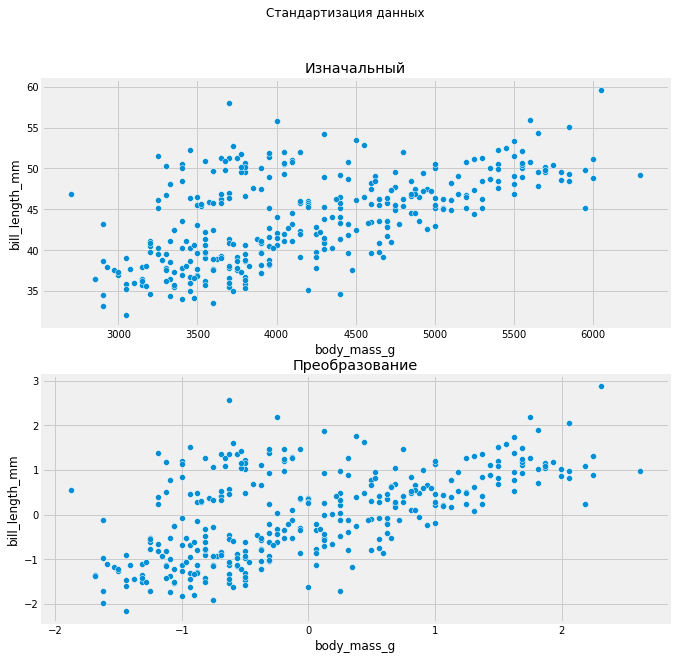

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.scatterplot(data=data, x='body_mass_g', y='bill_length_mm', ax=ax[0])
ax[0].set_title('Изначальный')

sns.scatterplot(data=data_scaler, x='body_mass_g', y='bill_length_mm', ax=ax[1])
ax[1].set_title('Преобразование')

plt.suptitle('Стандартизация данных')
plt.show()

## Кодирование категориальных признаков

In [ ]:
categorical = [i for i in data.columns if data[i].dtype.name == 'object'] 
categorical

['species', 'island', 'sex']

In [ ]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [ ]:
import numpy as np

data["sex"] = np.where(data["sex"].str.contains("fe"), -1, 1)
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,-1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,-1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,-1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [ ]:
data_cat = data.copy()

data_cat = pd.get_dummies(data_cat, columns=categorical)

data_cat.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,1,0


## Анализ зависимостей

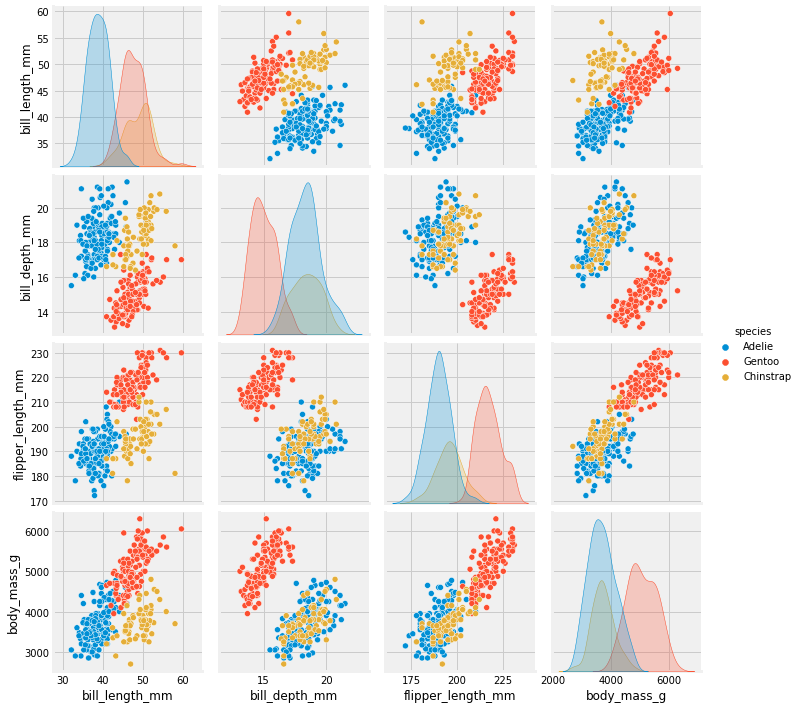

In [ ]:
sns.pairplot(data, hue='species')

Из графиков видно, что вид Gentoo выделяется в отдельный кластер при построении зависимости между длиной клюва и длиной крыла (bill_depth и flipper_length), толщиной клюва и массой (bill_depth и body_mass). 

<AxesSubplot:xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

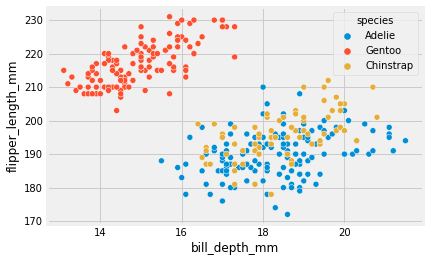

In [ ]:
sns.scatterplot(data=data, x='bill_depth_mm', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

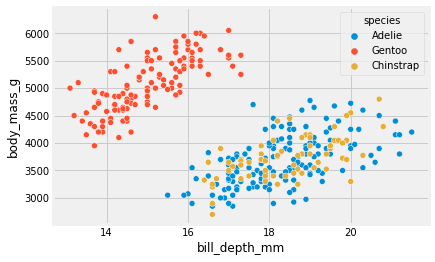

In [ ]:
sns.scatterplot(data=data, x='bill_depth_mm', y='body_mass_g', hue='species')

## Тепловая карта зависимостей признаков

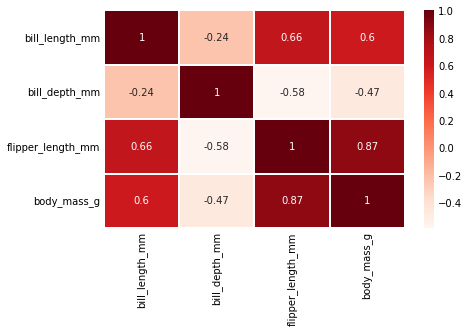

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.show()

<AxesSubplot:>

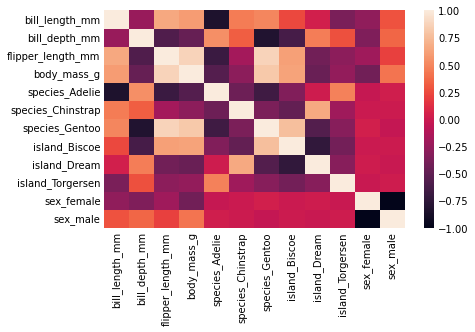

In [ ]:
sns.heatmap(data_cat.corr())

## Предположение о значимости каждого признака для будущего анализа этого набора данных

Длина крыла коррелирует с двумя другими признаками - длина клюва и масса, поэтому, наверное, этим признаком можно было бы пренебречь в дальнейшем рассмотрении данного набора данных

## Метод главных компонент для уменьшения размерности

In [ ]:
from sklearn.decomposition import PCA 
 
data_pca = data_scaler[numeric].copy()

pca = PCA(n_components=3) 
data_pca = pca.fit_transform(data_pca) 

data_pca =  pd.DataFrame(data_pca, columns=[f'{i}' for i in range(1, 4)])
data_pca.head()

,1,2,3
0,-1.843445,0.047702,-0.232794
1,-1.306762,-0.428348,-0.029562
2,-1.369181,-0.154476,0.198672
3,-1.878827,-0.002048,-0.618596
4,-1.911748,0.829210,-0.686584


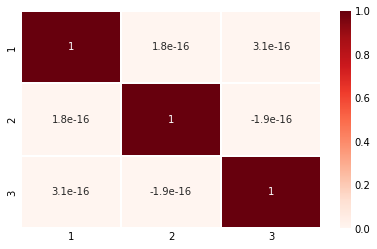

In [ ]:
sns.heatmap(data_pca.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.show()